First, import all the necessary libraries:
* liblibra_core - for general data types from Libra
* libra_py - for the normal modes module
* py3Dmol - for visualization

The output of the cell below will throw a bunch of warnings, but this is not a problem nothing really serios. So just disregard them.

In [11]:
from liblibra_core import *
from libra_py import *
import math
import py3Dmol

In [12]:
def test_data(x):
    x.Calculate_Estimators()
    x.Calculate_Mini_Max()

    print "ave = ",x.ave
    print "var = ",x.var
    print "sd = ",x.sd
    print "se = ",x.se
    print "mse = ",x.mse
    print "mae = ",x.mae
    print "rmse = ",x.rmse
    print "min_val =", x.min_val
    print "min_indx =", x.min_indx
    print "max_val =", x.max_val
    print "max_indx =", x.max_indx

In [13]:
x = DATA([1.0, 0.5, 2.0, -0.5])
print x

In [14]:
test_data(x)

ave =  0.75
var =  1.08333333333
sd =  1.04083299973
se =  0.520416499867
mse =  0.8125
mae =  0.75
rmse =  0.901387818866
min_val = -0.5
min_indx = 3
max_val = 2.0
max_indx = 2


In [15]:
x.ScaleData(2.0)
test_data(x)

ave =  1.5
var =  4.33333333333
sd =  2.08166599947
se =  1.04083299973
mse =  3.25
mae =  1.5
rmse =  1.80277563773
min_val = -1.0
min_indx = 3
max_val = 4.0
max_indx = 2


In [16]:
x.LinearTransformData(0.5, 1.0)
test_data(x)

ave =  1.75
var =  1.08333333333
sd =  1.04083299973
se =  0.520416499867
mse =  0.8125
mae =  0.75
rmse =  0.901387818866
min_val = 0.5
min_indx = 3
max_val = 3.0
max_indx = 2


In [17]:
print x.Data
print Cpp2Py(x.Data)

[2.0, 1.5, 3.0, 0.5]


In [18]:
x = []
for i in xrange(100):
    x.append(0.01*i)

rnd = Random()
y = []
for i in xrange(100000):
    y.append(rnd.uniform(0.0, 1.0))
    #y.append(rnd.normal())
    
z = DATA(y)

dens, cum = z.Calculate_Distribution(x)

#sz = len(x)
#for i in xrange(sz):
#    print i, x[i], dens[i], cum[i]
#print x, dens, cum

In [19]:
import matplotlib
#matplotlib.use('Agg')

import matplotlib.pyplot as plt
#from matplotlib.pyplot import figure
%matplotlib inline


plt.rc('axes', titlesize=24)      # fontsize of the axes title
plt.rc('axes', labelsize=20)      # fontsize of the x and y labels
plt.rc('legend', fontsize=20)     # legend fontsize
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)

colors = {}

colors.update({"11": "#8b1a0e"})  # red       
colors.update({"12": "#FF4500"})  # orangered 
colors.update({"13": "#B22222"})  # firebrick 
colors.update({"14": "#DC143C"})  # crimson   

colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen  
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive      

colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue  

colors.update({"41": "#2F4F4F"})  # darkslategray

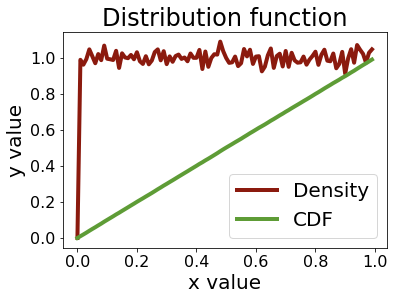

In [20]:
plt.title('Distribution function')
plt.xlabel('x value')
plt.ylabel('y value')
plt.plot(x, dens, label='Density', linewidth=4, color = colors["11"]) 
plt.plot(x, cum, label='CDF', linewidth=4, color = colors["21"]) 
plt.legend()
plt.show()
plt.close()